In [1]:
from datasets import load_dataset
dataset = load_dataset("yelp_review_full")

import pandas as pd
train_df = pd.DataFrame(dataset["train"])
test_df = pd.DataFrame(dataset["test"])

Generating train split:   0%|          | 0/650000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [2]:
x = train_df['text']
y = train_df['label']

In [3]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.2 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 5.3 MB/s eta 0:00:00


In [4]:
import json
import contractions
import re
slang_dict = json.load(open('/kaggle/input/english-slang/slang.json', 'r'))
def preprocess(text):
    # Convert text to UTF-8 encoding
    text = text.encode('utf-8').decode('utf-8')

    # Convert special characters
    text = text.lower().replace('\n', ' ').replace('\r', ' ').replace('\t', ' ').replace('\\n', ' ').replace('\\r', ' ').replace('\\t', ' ')

    # Expand contractions
    text = contractions.fix(text)

    # Remove quotation marks around words
    text = re.sub(r'\"(\w+)\s*\"', r'\1', text)

    # Replace dots that are not between numbers with a space
    text = re.sub(r'(?<!\d)\.|\.(?!\d)', ' ', text)

    # Handle punctuation (excluding numbers)
    text = re.sub(r"[^\w\s\.]", r" ", text)

    # Handle dots at the end of sentences (excluding numbers)
    text = re.sub(r"\b\.(?!\d)", r" ", text)
    ## Replacing slangs
    words = text.split()
    corrected_slang_words = []
    for word in words:
        if word in slang_dict:
            word = slang_dict[word].lower()
        corrected_slang_words.append(word)

    return text

In [5]:
x_preprocessed = []
for text in x:
    x_preprocessed.append(preprocess(text))
x = x_preprocessed

In [6]:
x[1]

'unfortunately  the frustration of being dr  goldberg s patient is a repeat of the experience i have had with so many other doctors in nyc    good doctor  terrible staff   it seems that his staff simply never answers the phone   it usually takes 2 hours of repeated calling to get an answer   who has time for that or wants to deal with it   i have run into this problem with many other doctors and i just do not get it   you have office workers  you have patients with medical needs  why is not anyone answering the phone   it is incomprehensible and not work the aggravation   it is with regret that i feel that i have to give dr  goldberg 2 stars '

In [7]:
from gensim.models import Word2Vec

# Example input data (replace with your own preprocessed data)

data = []
for sentence in x:
    data.append(sentence.split())
print("Data is created")
# Define Word2Vec parameters
vector_size = 256 #100  # Dimensionality of the word vectors
window = 5 #5  # Maximum distance between the current and predicted word within a sentence
min_count = 10 #1  # Ignores all words with a total frequency lower than this
sg = 1 #0  # Training algorithm: CBOW (0) or skip-gram (1), SKIP GRAM IS BETTER, LEARNED FROM COURSE

# Train Word2Vec model
model = Word2Vec(sentences=data, vector_size=vector_size, window=window, min_count=min_count, sg=sg)

# Optionally train for more epochs
# model.train(data, total_examples=model.corpus_count, epochs=10)
# Save the trained model to a file
model.save('word2vec_model_LARGE_256_5_1_1.bin')



Data is created


https://www.baeldung.com/cs/word-embeddings-cbow-vs-skip-gram#:~:text=According%20to%20the%20original%20paper,better%20represent%20more%20frequent%20words.

https://www.researchgate.net/publication/378738786_The_comparison_and_analysis_of_Skip-gram_and_CBOW_in_creating_financial_sentimental_dictionary

In [13]:
model

In [8]:

# Find similar words
similar_words_amazing = model.wv.most_similar('amazing')
similar_words_terrible = model.wv.most_similar('terrible')

In [9]:
similar_words_amazing

[('incredible', 0.8868997693061829),
 ('awesome', 0.884756863117218),
 ('fantastic', 0.852196455001831),
 ('phenomenal', 0.8384959697723389),
 ('fabulous', 0.786296546459198),
 ('outstanding', 0.7801915407180786),
 ('wonderful', 0.7527675628662109),
 ('excellent', 0.7492627501487732),
 ('superb', 0.7274727821350098),
 ('terrific', 0.7265809178352356)]

In [10]:
similar_words_terrible

[('horrible', 0.9425191879272461),
 ('awful', 0.8715782165527344),
 ('horrendous', 0.8070825338363647),
 ('horrid', 0.8062782883644104),
 ('lousy', 0.7586703896522522),
 ('atrocious', 0.7233906388282776),
 ('horrific', 0.6967999935150146),
 ('aweful', 0.6909676790237427),
 ('dreadful', 0.6837438941001892),
 ('bad', 0.6736840605735779)]

In [30]:
model = Word2Vec.load('/kaggle/input/word2vec-large-256-5-10-1/word2vec_model_LARGE_256_5_10_1.bin')

In [11]:
# Find similar words
similar_words = model.wv.most_similar('sushi', topn=5)
print('Similar words to "sushi":', similar_words)

# Calculate cosine similarity between two words
similarity_score = model.wv.similarity('italian', 'sushi')
print('Cosine similarity between "italian" and "sushi":', similarity_score)

# Calculate cosine similarity between two words
similarity_score = model.wv.similarity('italian', 'pizza')
print('Cosine similarity between "italian" and "pizza":', similarity_score)

# Calculate cosine similarity between two words
similarity_score = model.wv.similarity('japanese', 'sushi')
print('Cosine similarity between "japanese" and "sushi":', similarity_score)

# Calculate cosine similarity between two words
similarity_score = model.wv.similarity('japanese', 'pizza')
print('Cosine similarity between "japanese" and "pizza":', similarity_score)


Similar words to "sushi": [('sashimi', 0.7559454441070557), ('nigiri', 0.7263278365135193), ('ayce', 0.713910698890686), ('maki', 0.6613011956214905), ('sushis', 0.6272545456886292)]
Cosine similarity between "italian" and "sushi": 0.26738885
Cosine similarity between "italian" and "pizza": 0.4306146
Cosine similarity between "japanese" and "sushi": 0.52857655
Cosine similarity between "japanese" and "pizza": 0.118901804


In [12]:

analogy1 = model.wv.most_similar(positive=['wine', 'malt'], negative=['grape'], topn=3)
print('1. Analogy: wine - grape + malt =', analogy1[0])

analogy1 = model.wv.most_similar(positive=['pesto', 'tomato'], negative=['basil'], topn=3)
print('1. Analogy: pesto - basil + tomato =', analogy1[0])



1. Analogy: wine - grape + malt = ('beer', 0.5273988842964172)
1. Analogy: pesto - basil + tomato = ('sundried', 0.6006603240966797)


<img src="https://www.thespruceeats.com/thmb/N9TEoqtQz-R9zkjMXM8I530sj30=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/red-wine-is-poured-into-a-glass-from-a-bottle--light-background--1153158143-98320451802c485cb6d7b5437c7fd60a.jpg" alt="drawing" width="100"/> <img src="https://static.vecteezy.com/system/resources/previews/000/380/520/original/minus-vector-icon.jpg" alt="drawing" width="100"/> <img src="https://img.imageboss.me/fourwinds/width/425/dpr:2/shop/products/blackmonukka.jpg?v=1538780984" alt="drawing" width="100"/> <img src="https://t4.ftcdn.net/jpg/01/26/10/59/360_F_126105961_6vHCTRX2cPOnQTBvx9OSAwRUapYTEmYA.jpg" alt="drawing" width="100"/> <img src="https://upload.wikimedia.org/wikipedia/commons/9/98/Gr%C3%BCnmalz.jpg" alt="drawing" width="100"/> <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSMEfkQITJ-uqEIX76ghbK8OeHLF5Bvbks2L8RzmKJY3g&s" alt="drawing" width="100"/> <img src="https://static.toiimg.com/thumb/93353895.cms?width=400&height=300&resizemode=4&imgsize=54288" alt="drawing" width="100"/> 

<img src="https://upload.wikimedia.org/wikipedia/commons/c/c9/BasilPesto.JPG" alt="drawing" width="100"/> <img src="https://static.vecteezy.com/system/resources/previews/000/380/520/original/minus-vector-icon.jpg" alt="drawing" width="100"/> <img src="https://www.clickandgrow.com/cdn/shop/products/Basil_plant_1280x960_0fc95446-605c-49e3-aa42-c6f3a171b8ae.jpg" alt="drawing" width="100"/> <img src="https://t4.ftcdn.net/jpg/01/26/10/59/360_F_126105961_6vHCTRX2cPOnQTBvx9OSAwRUapYTEmYA.jpg" alt="drawing" width="100"/> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/89/Tomato_je.jpg/1200px-Tomato_je.jpg" alt="drawing" width="100"/> <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSMEfkQITJ-uqEIX76ghbK8OeHLF5Bvbks2L8RzmKJY3g&s" alt="drawing" width="100"/> <img src="https://www.budgetbytes.com/wp-content/uploads/2012/08/Not-Sun-Dried-Tomato-Sauce-front.jpg" alt="drawing" width="100"/> 

In [13]:
# Find similar words
similar_words = model.wv.most_similar('sushi', topn=5)
print('Similar words to "sushi":', similar_words)

Similar words to "sushi": [('sashimi', 0.7559454441070557), ('nigiri', 0.7263278365135193), ('ayce', 0.713910698890686), ('maki', 0.6613011956214905), ('sushis', 0.6272545456886292)]


In [14]:
# Find similar words
similar_words = model.wv.most_similar('italian', topn=5)
print('Similar words to "italian":', similar_words)

Similar words to "italian": [('mexican', 0.6268699169158936), ('mediterranean', 0.6218019127845764), ('stallion', 0.6103924512863159), ('greek', 0.6076419353485107), ('asian', 0.5981730222702026)]


In [15]:
# Word frequencies
word_freq = model.wv.key_to_index
most_common_words = sorted(word_freq, key=word_freq.get, reverse=False)[:10]
print('Most common words:', most_common_words)

Most common words: ['the', 'and', 'i', 'a', 'to', 'was', 'it', 'is', 'of', 'not']


In [38]:
def get_average_word2vec(sentence):
    word_vectors = []
    for word in sentence.split():
        if word in model.wv:
            word_vectors.append(model.wv[word])
    if len(word_vectors)>0:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)


In [20]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Assuming you have a list of sentences and their corresponding labels
sentences = x  # List of sentences
labels = y  # List of corresponding labels

# Convert labels to numeric values
label_to_numeric = {label: i for i, label in enumerate(set(labels))}
numeric_labels = np.array([label_to_numeric[label] for label in labels])

In [32]:
# Convert sentences to their corresponding Word2Vec embeddings
sentence_vectors = []
for sentence in sentences[:10000]:
    # Assuming you have a function to convert each sentence to its Word2Vec embedding
    vector = get_average_word2vec(sentence)  # Example function to get Word2Vec embedding
    sentence_vectors.append(vector)

sentence_vectors = np.array(sentence_vectors)

# Perform t-SNE
tsne = TSNE(n_components=3, random_state=42)
vectors_3d = tsne.fit_transform(sentence_vectors)



test
test


In [33]:
vectors_3d.shape

(10000, 3)

<Figure size 1000x800 with 0 Axes>

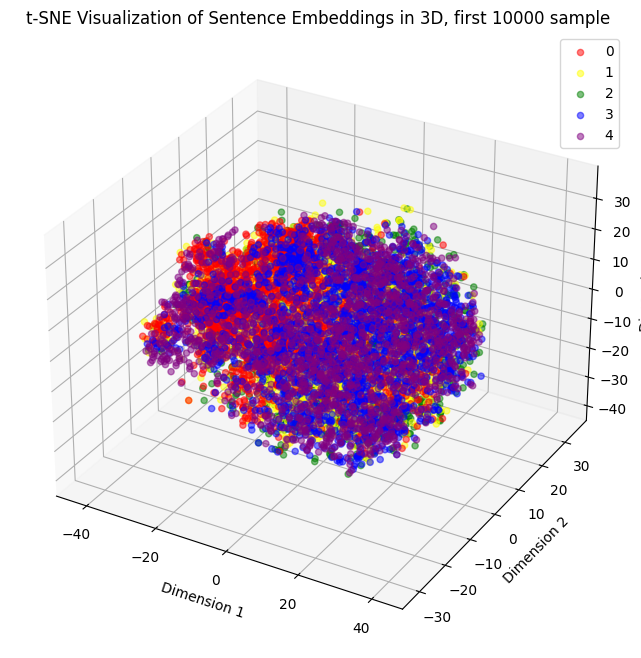

In [34]:
# Plot
label_colors = {"0":"red","1":"yellow","2":"green","3":"blue","4":"purple"}
plt.figure(figsize=(10, 8))
# Plot in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
numeric_labels = numeric_labels[:10000]
for label, color in label_colors.items():
    indices = numeric_labels == label_to_numeric[int(label)]
    ax.scatter(vectors_3d[indices, 0], vectors_3d[indices, 1], vectors_3d[indices, 2], c=color, label=label, alpha=0.5)

ax.set_title('t-SNE Visualization of Sentence Embeddings in 3D, first 10000 sample')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.legend()
plt.show()

In [253]:
x[0]

'dr goldberg offers everything i look for in a general practitioner he is nice and easy to talk to without being patronizing he is always on time in seeing his patients he is affiliated with a top notch hospital nyu which my parents have explained to me is very important in case something happens and you need surgery and you can get referrals to see specialists without having to see him first really what more do you need i am sitting here trying to think of any complaints i have about him but i am really drawing a blank'

In [35]:
# Find similar words
similar_words = model.wv.similar_by_word('patronizing', topn=5)
print('Similar words to "patronizing":', similar_words)

Similar words to "patronizing": [('frequenting', 0.5402674674987793), ('patronize', 0.5291619300842285), ('unproffesional', 0.5280306935310364), ('behaviour', 0.5170702934265137), ('unkind', 0.511965274810791)]


In [36]:
text = x[0]
keywords = []
for word in text.split():
    if word in model.wv:
        similar_words = model.wv.similar_by_word(word, topn=1)
        keywords.extend([similar_word[0] for similar_word in similar_words])
print("Keywords:", list(set(keywords)))

Keywords: ['did', 'happen', 'talked', 'bottom', 'surgeon', 'np', 'seeing', 'provides', 'tso', 'frequenting', 'havnt', 'her', 'difficult', 'jennings', 'cases', 'less', 'extremely', 'how', 'vist', '1st', 'doctor', 'alway', 'your', 'smal', 'w', 'abut', 'however', 'he', 'we', 'hearing', 'iam', 'was', 'she', 'that', 'lactation', 'complaint', 'onto', 'attempting', 'anything', 'goodly', 'clients', 'our', 'grandparents', 'reallly', 'drawings', 'explaining', 'crucial', 'knotch', 'us', 'got', 'fot', 'customshop', 'being', 'siting', 'looked', 'inthe', 'affiliation', 'stare', 'despite', 'lovely', 'referral', 'probably', 'needed', 'having', 'everthing', 'clinic', 'also', 'cannot', 'ot']


In [39]:
query = "Italian restaurant with great ambiance"
query_vector = get_average_word2vec(query)
similar_sentences = []
for sentence in x[:65000]:
    sentence_vector = get_average_word2vec(sentence)
    similarity_score = np.dot(query_vector, sentence_vector) / (np.linalg.norm(query_vector) * np.linalg.norm(sentence_vector))
    similar_sentences.append((sentence, similarity_score))
similar_sentences = sorted(similar_sentences, key=lambda x: x[1], reverse=True)[:5]
print("Top similar sentences:")
for sentence, score in similar_sentences:
    print(f"- {sentence} (Similarity: {score})")


/tmp/ipykernel_33/1729701784.py:6: RuntimeWarning: invalid value encountered in scalar divide
  similarity_score = np.dot(query_vector, sentence_vector) / (np.linalg.norm(query_vector) * np.linalg.norm(sentence_vector))


Top similar sentences:
- great ambience and food  (Similarity: 0.8416973352432251)
- the food was excellent  the ambiance cozy   great for date night  (Similarity: 0.8380798101425171)
- great restaurant with great food nice wine  the inside ambience is good but there is no nice view of the city  (Similarity: 0.8358926177024841)
- great thai food   ambiance is great  good service  great food  (Similarity: 0.8319563269615173)
- great service  food was good bar food nice atmosphere  great place to chill and have a beer  (Similarity: 0.8269951939582825)


In [40]:
query = "The stuff is rude.Their attitude is so bad"
query_vector = get_average_word2vec(query)
similar_sentences = []
for sentence in x[:65000]:
    sentence_vector = get_average_word2vec(sentence)
    similarity_score = np.dot(query_vector, sentence_vector) / (np.linalg.norm(query_vector) * np.linalg.norm(sentence_vector))
    similar_sentences.append((sentence, similarity_score))
similar_sentences = sorted(similar_sentences, key=lambda x: x[1], reverse=True)[:5]
print("Top similar sentences:")
for sentence, score in similar_sentences:
    print(f"- {sentence} (Similarity: {score})")

/tmp/ipykernel_33/3910004658.py:6: RuntimeWarning: invalid value encountered in scalar divide
  similarity_score = np.dot(query_vector, sentence_vector) / (np.linalg.norm(query_vector) * np.linalg.norm(sentence_vector))


Top similar sentences:
- awful  food is bad and there is nogood service  (Similarity: 0.8291990756988525)
- bad attitudes from the workers  the food is not that great to put up with the mood of this place  this is not like the soup nazi from seinfeld  sometimes the place is open and sometimes it is not which makes for crappy business  (Similarity: 0.8150925040245056)
- this place is dirty  the owner is miserable and the food is terrible  it is amazing they have been in business this long  (Similarity: 0.8122240304946899)
- food is good but beware of racial bias  bad attitudes  if your skin color is darker than the mongloids running the place expect bad attitudes  the midget that works the drive thru window was the worse  but she is better now  still will not give me eye contact  the younger ore american girl that works there has always been nice    but funny  (Similarity: 0.8067569732666016)
- it is very inconsistent here in terms of barista skills  unfortunately  sometimes i get a gre